In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exercise-detection-dataset/exercise_angles.csv


In [2]:
df = pd.read_csv("/kaggle/input/exercise-detection-dataset/exercise_angles.csv")
df

,Side,Shoulder_Angle,Elbow_Angle,Hip_Angle,Knee_Angle,Ankle_Angle,Shoulder_Ground_Angle,Elbow_Ground_Angle,Hip_Ground_Angle,Knee_Ground_Angle,Ankle_Ground_Angle,Label
0,left,10.639208,174.466813,174.785143,179.848140,179.419276,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
1,left,10.590342,174.428706,174.765042,179.775215,179.386147,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
2,left,10.546746,174.489431,174.785790,179.660017,179.333710,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
3,left,10.487682,174.614913,174.759542,179.614223,179.313926,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
4,left,10.412107,174.758503,174.737721,179.570564,179.298805,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...
31028,left,12.723974,81.226330,149.356832,154.358415,178.103121,90.0,90.0,90.0,90.0,-90.0,Russian twists
31029,left,9.080920,82.486551,148.100509,152.680540,178.625318,90.0,90.0,90.0,90.0,-90.0,Russian twists
31030,left,4.118076,85.164707,148.329461,152.458288,178.605852,90.0,90.0,90.0,90.0,-90.0,Russian twists
31031,left,0.558065,89.419330,146.742440,149.930600,179.604753,90.0,90.0,90.0,90.0,-90.0,Russian twists


In [3]:
df["Label"].unique()

array(['Jumping Jacks', 'Squats', 'Push Ups', 'Pull ups',
       'Russian twists'], dtype=object)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [5]:
label_encoder = LabelEncoder()
le = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])
df["Side"] = le.fit_transform(df["Side"])
df.head(5)

,Side,Shoulder_Angle,Elbow_Angle,Hip_Angle,Knee_Angle,Ankle_Angle,Shoulder_Ground_Angle,Elbow_Ground_Angle,Hip_Ground_Angle,Knee_Ground_Angle,Ankle_Ground_Angle,Label
0,0,10.639208,174.466813,174.785143,179.848140,179.419276,90.0,90.0,90.0,90.0,90.0,0
1,0,10.590342,174.428706,174.765042,179.775215,179.386147,90.0,90.0,90.0,90.0,90.0,0
2,0,10.546746,174.489431,174.785790,179.660017,179.333710,90.0,90.0,90.0,90.0,90.0,0
3,0,10.487682,174.614913,174.759542,179.614223,179.313926,90.0,90.0,90.0,90.0,90.0,0
4,0,10.412107,174.758503,174.737721,179.570564,179.298805,90.0,90.0,90.0,90.0,90.0,0


In [6]:
num_classes = len(label_encoder.classes_)
print(num_classes)

5


In [7]:
X = df.drop(columns = ["Label"])
y = df["Label"]

In [8]:
X_train ,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.25, random_state = 42)

In [9]:
print(f"Shape of Trainig input dataset is {X_train.shape}")
print(f"Shape of Test input dataset is {X_test.shape}")
print(f"Shape of Trainig output dataset is {y_train.shape}")
print(f"Shape of Test output dataset is {y_test.shape}")

Shape of Trainig input dataset is (23274, 11)
Shape of Test input dataset is (7759, 11)
Shape of Trainig output dataset is (23274,)
Shape of Test output dataset is (7759,)


In [10]:
sc = StandardScaler()
X_train, X_test = sc.fit_transform(X_train), sc.fit_transform(X_test)
print(X_train[0:5])

[[ 0.         -0.94834599 -0.51188722  0.08726365 -0.0721749   0.81740092
   0.08107913  0.07862684 -4.0330607  -3.42316123 -2.74094906]
 [ 0.          1.10368436 -0.8910468  -0.50015827 -0.61471983 -1.83870027
   0.08107913  0.07862684  0.24795064  0.29212764  0.36483713]
 [ 0.          0.91679028 -0.58588334  0.18303267  0.16179157 -2.27654948
   0.08107913  0.07862684  0.24795064  0.29212764  0.36483713]
 [ 0.         -0.73668169  0.97841416  0.54793601  0.62220945  0.7528249
   0.08107913  0.07862684  0.24795064  0.29212764  0.36483713]
 [ 0.         -0.25298458  0.73455914  0.57727022  0.23322028 -0.66425879
   0.08107913  0.07862684  0.24795064  0.29212764  0.36483713]]


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)
lr.fit(X_train,y_train)
y_predictions = lr.predict(X_test)

In [13]:
y_predictions

array([2, 3, 3, ..., 1, 0, 2])

In [14]:
y_test

16262    2
28290    3
28692    3
29587    3
2772     0
        ..
27174    3
14517    2
11098    2
20429    1
7792     4
Name: Label, Length: 7759, dtype: int64

In [15]:
from sklearn.metrics import accuracy_score, classification_report
# Accuracy score
accuracy = accuracy_score(y_test, y_predictions)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_predictions))


Accuracy: 0.6955793272328908
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.65      0.58      1283
           1       0.50      0.48      0.49      1665
           2       0.90      0.86      0.88      2455
           3       0.83      0.89      0.86      1087
           4       0.64      0.55      0.59      1269

    accuracy                           0.70      7759
   macro avg       0.68      0.68      0.68      7759
weighted avg       0.70      0.70      0.70      7759



In [16]:
## Now using pytorch for classifying ##

import torch
import torch.nn as nn
import torch.optim as optim

In [17]:
class SimpleClassifier(nn.Module):
    def __init__(self,input_size, num_classes):
        super(SimpleClassifier, self).__init__()
        self.model = nn.Sequential(
    nn.Linear(input_size, 120),
    nn.ReLU(),
    nn.Linear(120,60),
    nn.ReLU(),
    nn.Linear(60,20),
    nn.ReLU(),
    nn.Linear(20,10),
    nn.ReLU(),
    nn.Linear(10, num_classes),
)
    
    def forward(self, X):
        X = X.to(torch.float32)
        output = self.model(X)
        return output

In [18]:
model = SimpleClassifier(X_train.shape[1], num_classes)


In [19]:
y_train.shape

(23274,)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 2e-3)
X_train = torch.from_numpy(X_train)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_train = torch.from_numpy(y_train)
X_test, y_test = torch.from_numpy(X_test), torch.from_numpy(y_test)

In [23]:
num_epochs = 500
max_accuracy = 0.0
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []
for epoch in range(num_epochs):
    correct = 0
    total = 0
    running_loss = 0.0
    model.train()
    
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    _,y_pred = torch.max(outputs, 1)
    train_accuracy = (y_pred == y_train).sum().item()
    train_accuracy /= y_train.shape[0]
    running_loss += loss
    train_loss = running_loss/y_train.shape[0]
    train_loss = train_loss.detach().numpy()
    training_losses.append(train_loss)
    training_accuracies.append(train_accuracy)
#     if (epoch%50 == 0):
#         print(f"Epoch :{epoch+1} || Training Loss :{train_loss}  || Trainig Accuracy :{train_accuracy} ")
    ## Evaluation Phase ##
    model.eval()
    
    with torch.no_grad():
        outputs = model(X_test)
        loss = criterion(outputs, y_test)
        _, y_pred = torch.max(outputs, 1)
        valid_loss = loss/y_test.shape[0]
        valid_accuracy = accuracy_score(y_test, y_pred)
    
    if(epoch%50 == 0):
        print(f"Epoch :{epoch+1} || Training Accuracy :{train_accuracy}  || Validation Accuracy :{valid_accuracy} ")
    validation_accuracies.append(valid_accuracy)
    validation_losses.append(valid_loss)
    
    if(valid_accuracy>max_accuracy):
        max_accuarcy = valid_accuracy
        chk = model.state_dict()
        torch.save(chk, "checkpoint.pt")

Epoch :1 || Training Accuracy :0.9335309787745982  || Validation Accuracy :0.9298878721484728 
Epoch :51 || Training Accuracy :0.9364956603935722  || Validation Accuracy :0.930661167676247 
Epoch :101 || Training Accuracy :0.9384721148062215  || Validation Accuracy :0.9305322850882846 
Epoch :151 || Training Accuracy :0.940104838016671  || Validation Accuracy :0.9341409975512308 
Epoch :201 || Training Accuracy :0.9421672252298703  || Validation Accuracy :0.9313055806160587 
Epoch :251 || Training Accuracy :0.9437999484403197  || Validation Accuracy :0.9345276453151179 
Epoch :301 || Training Accuracy :0.9452178396493942  || Validation Accuracy :0.9355587060188169 
Epoch :351 || Training Accuracy :0.9453037724499441  || Validation Accuracy :0.9382652403660265 
Epoch :401 || Training Accuracy :0.9444014780441694  || Validation Accuracy :0.9392963010697255 
Epoch :451 || Training Accuracy :0.9475809916645184  || Validation Accuracy :0.9399407140095373 


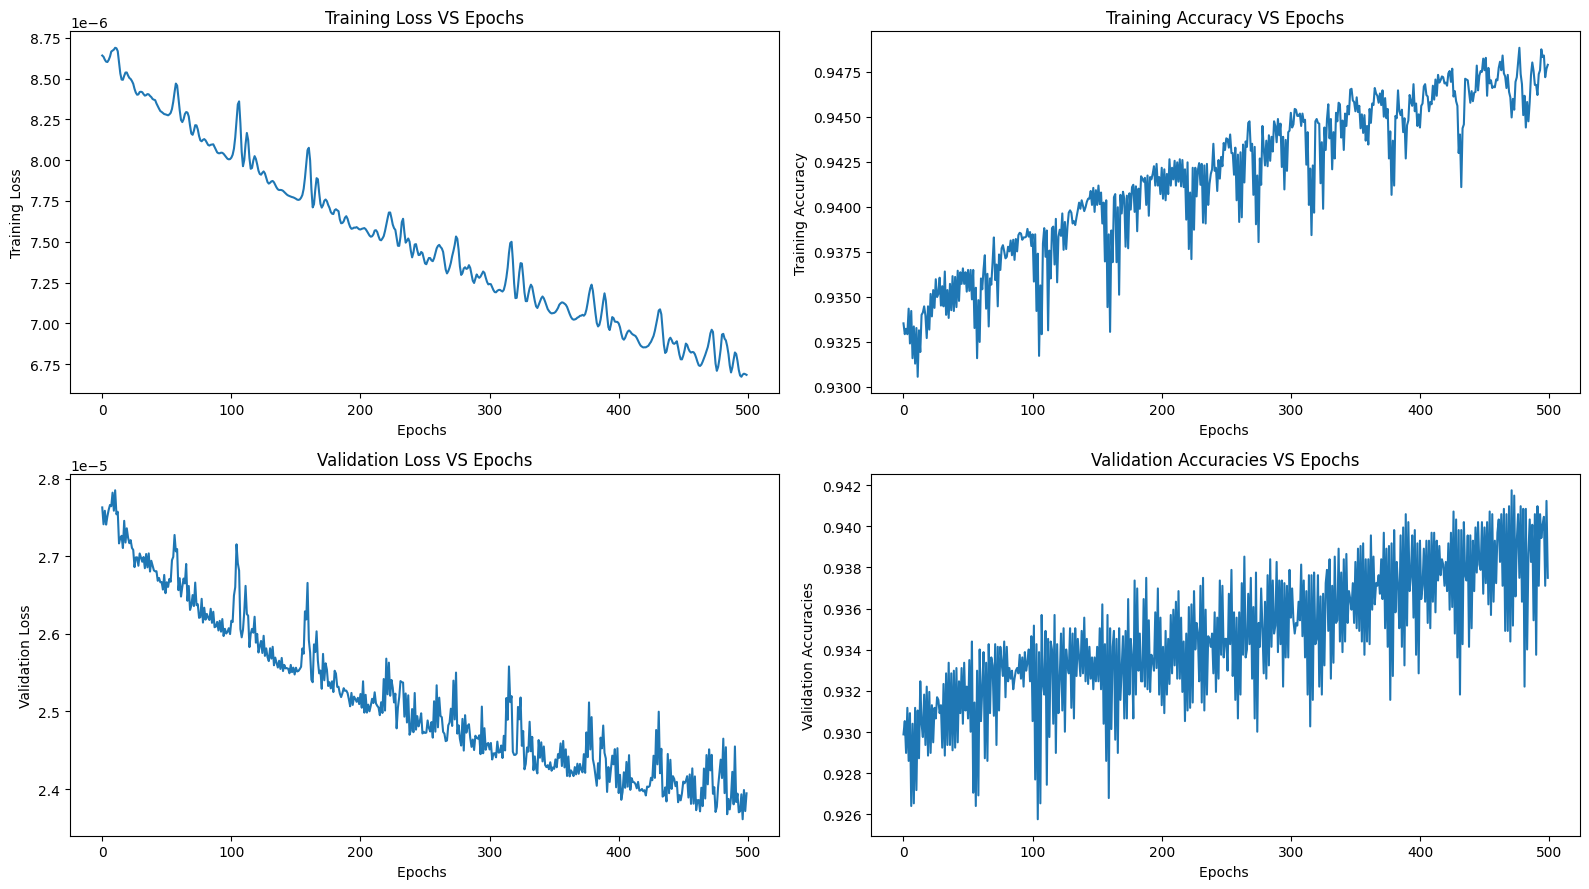

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize = (16,9))
## First Plot is Training Loss vs Epochs ##
axs[0,0].plot(training_losses)
axs[0,0].set_title("Training Loss VS Epochs")
axs[0,0].set_xlabel("Epochs ")
axs[0,0].set_ylabel("Training Loss")

##
axs[0,1].plot(training_accuracies)
axs[0,1].set_title("Training Accuracy VS Epochs")
axs[0,1].set_xlabel("Epochs ")
axs[0,1].set_ylabel("Training Accuracy")
##
axs[1,0].plot(validation_losses)
axs[1,0].set_title("Validation Loss VS Epochs")
axs[1,0].set_xlabel("Epochs ")
axs[1,0].set_ylabel("Validation Loss")
##
axs[1,1].plot(validation_accuracies)
axs[1,1].set_title("Validation Accuracies VS Epochs")
axs[1,1].set_xlabel("Epochs ")
axs[1,1].set_ylabel("Validation Accuracies")

plt.tight_layout()
plt.show()